In [13]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [14]:
duckdb_path = "data/duckdb.database"
conn = duckdb.connect(database=duckdb_path)

table_name = "Silver_SensorData_lite"
query = f"SELECT x, y FROM {table_name}"
result = conn.execute(query)
df = pd.DataFrame(result.fetchall(), columns=['x', 'y'])

In [15]:
img = plt.imread('kauppa.jpg')

In [16]:
heatmap, xedges, yedges = np.histogram2d(df['y'], df['x'], bins=(img.shape[0], img.shape[1]))
extent = [0, img.shape[1], 0, img.shape[0]]

Text(0, 0.5, 'Y')

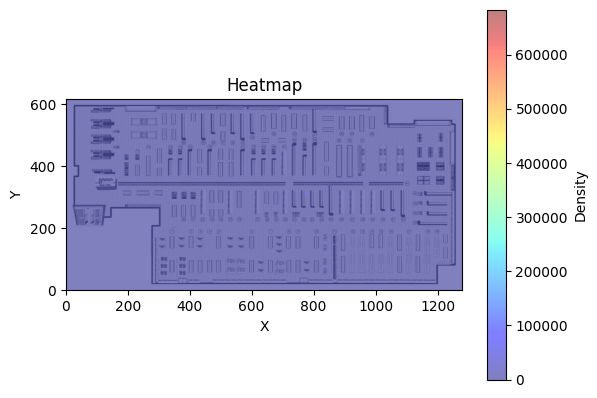

In [17]:
plt.imshow(img, extent=extent)

# Lisää heatmap
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.jet, alpha=0.5)

# Aseta tarvittavat otsikot ja muut tiedot
plt.colorbar(label='Density')
plt.title('Heatmap')
plt.xlabel('X')
plt.ylabel('Y')

In [18]:
plt.show()
conn.close()